In [12]:
import astropy
from astropy.io import fits
import numpy as np, matplotlib.pyplot as plt
import scipy
import mpdaf
from mpdaf.obj import Cube
from mpdaf.drs import PixTable
from PyMUSE.musecube import MuseCube
from astropy.modeling import models
%matplotlib inline
%matplotlib notebook
import glob
import montage_wrapper as montage
from astropy.wcs import WCS
import astromatic_wrapper as aw
from linetools.spectra.io import readspec
from astropy.visualization import make_lupton_rgb

## SIT45B:

MuseCube: Loading the cube fluxes and variances...
MuseCube: No white image given, creating one.


MuseCube: `new_white.fits` image saved to disk.


<IPython.core.display.Javascript object>


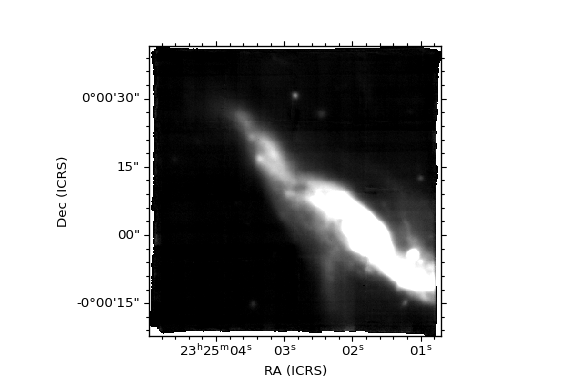

MuseCube: Ready!


<IPython.core.display.Javascript object>


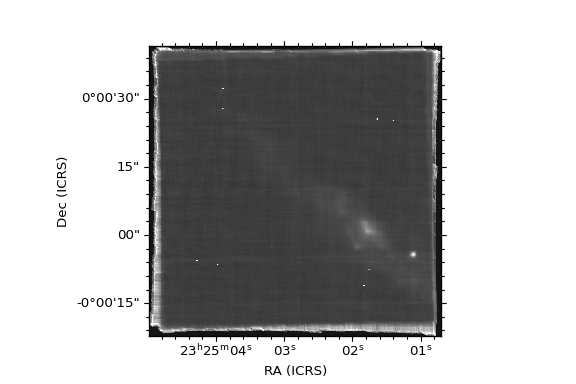

INFO: Auto-setting vmin to -9.721e+04 [aplpy.core]
INFO: Auto-setting vmax to  1.079e+06 [aplpy.core]


In [2]:
from PyMUSE.musecube import MuseCube
cube = MuseCube('/home/pc/Escritorio/SIT45/Cubos/SIT45B/ADP.2019-10-08T16_15_37.213-003.fits')
cube.create_white(new_white_fitsname='white_SIT45B.fits', stat=True, save=True)
coord_system = 'wcs'

/home/pc/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:993: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


<IPython.core.display.Javascript object>


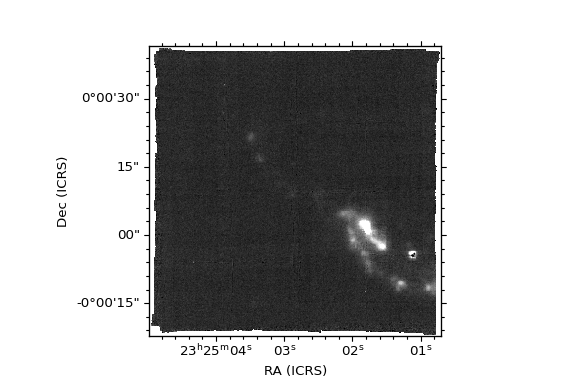

INFO: Auto-setting vmin to -1.762e+03 [aplpy.core]
INFO: Auto-setting vmax to  9.052e+03 [aplpy.core]


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [3]:
cube.get_image_wv_ranges([[6780,7790]],save=True,substract_cont=True)

In [11]:
%matplotlib inline
spec=cube.get_spec_from_ds9regfile('/home/pc/regionesSIT45B.reg',i=0)

IndexError: list index out of range

<Figure size 432x288 with 0 Axes>

### FILTERED IMAGES
Given the MUSE wavelength range PyMUSE can create r,i,R,V(Johnson) images:

<IPython.core.display.Javascript object>


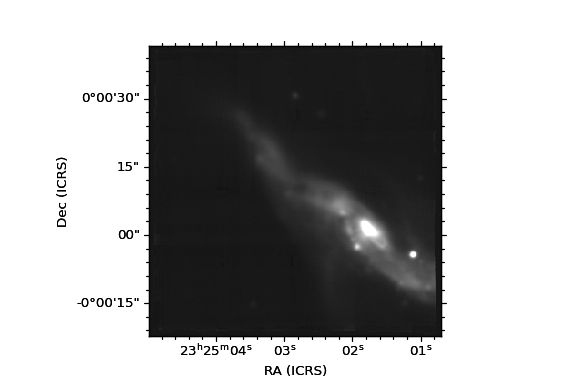

INFO: Auto-setting vmin to -7.774e+04 [aplpy.core]
INFO: Auto-setting vmax to  7.919e+05 [aplpy.core]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
cube.get_filtered_image('i', custom_filter=None, save=True)

In [7]:
cube.get_filtered_image('r', custom_filter=None, save=True)

INFO: Auto-setting vmin to -5.833e+04 [aplpy.core]
INFO: Auto-setting vmax to  5.915e+05 [aplpy.core]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<IPython.core.display.Javascript object>


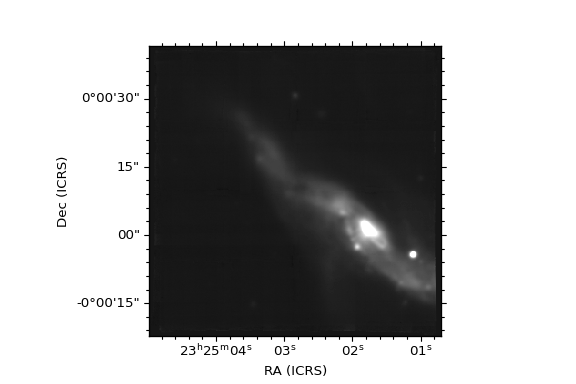

INFO: Auto-setting vmin to -6.304e+04 [aplpy.core]
INFO: Auto-setting vmax to  6.465e+05 [aplpy.core]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
cube.get_filtered_image('R', custom_filter=None, save=True)

<IPython.core.display.Javascript object>


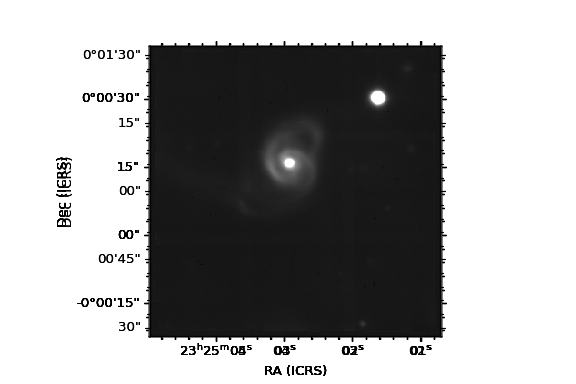

INFO: Auto-setting vmin to -4.550e+04 [aplpy.core]
INFO: Auto-setting vmax to  4.268e+05 [aplpy.core]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
cube.get_filtered_image('V', custom_filter=None, save=True)

#### Custom: Filtros adaptados a la eficiencia de VLT+MUSE.

<IPython.core.display.Javascript object>


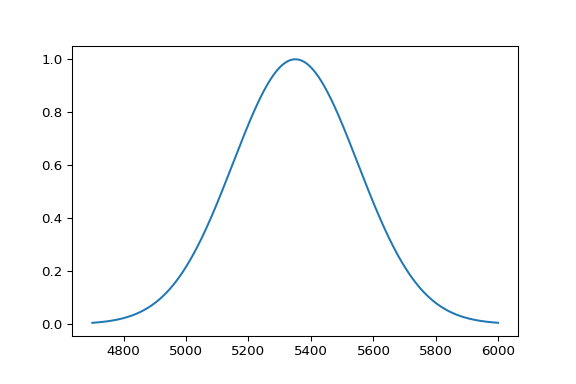

INFO: Auto-setting vmin to -4.257e+04 [aplpy.core]
INFO: Auto-setting vmax to  3.768e+05 [aplpy.core]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
Gauss=models.Gaussian1D(mean=5350,stddev=200,amplitude=1)
b=np.arange(4700,6000,1)
tc=Gauss(b)
plt.figure()
plt.plot(b,tc)
cube.get_filtered_image('b', custom_filter=[b,tc], save=True)

<IPython.core.display.Javascript object>


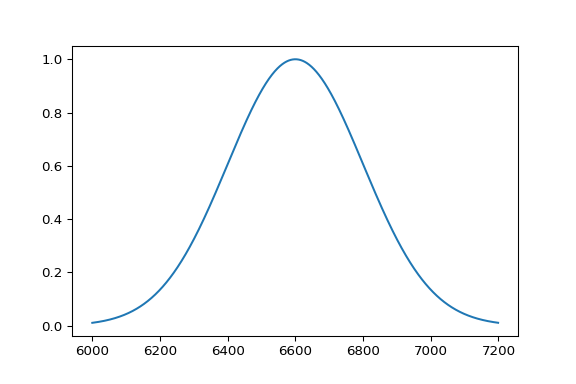

INFO: Auto-setting vmin to -7.268e+04 [aplpy.core]
INFO: Auto-setting vmax to  7.350e+05 [aplpy.core]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
Gauss=models.Gaussian1D(mean=6600,stddev=200,amplitude=1)
g=np.arange(6000,7200,1)
tc=Gauss(g)
plt.figure()
plt.plot(g,tc)
cube.get_filtered_image('g', custom_filter=[g,tc], save=True)

<IPython.core.display.Javascript object>


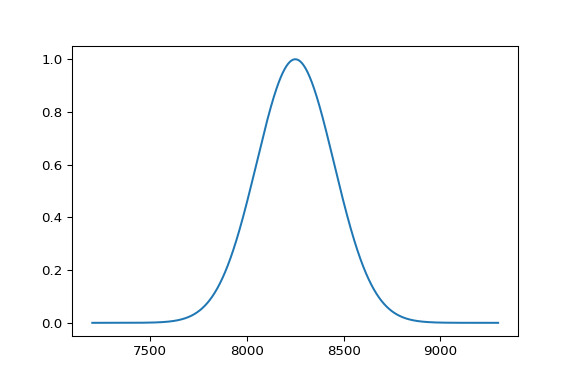

INFO: Auto-setting vmin to -9.097e+04 [aplpy.core]
INFO: Auto-setting vmax to  9.020e+05 [aplpy.core]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
Gauss=models.Gaussian1D(mean=8250,stddev=200,amplitude=1)
z=np.arange(7200,9300,1)
tc=Gauss(z)
plt.figure()
plt.plot(z,tc)
cube.get_filtered_image('z', custom_filter=[z,tc], save=True)

In [4]:
#images = ['/home/francisco/Escritorio/AyInvest2021/MOSAIC/2/sit45_b_uncutted/sit45_b_mb.fits', '/home/francisco/Escritorio/AyInvest2021/MOSAIC/2/sit45_b_uncutted/sit45_b_mg.fits', '/home/francisco/Escritorio/AyInvest2021/MOSAIC/2/sit45_b_uncutted/sit45_b_mr.fits']
images = ['/home/francisco/Escritorio/AyInvest2021/MOSAIC/2/sit45_b_uncutted/']
kwargs = {
            'code': 'SWarp',
            'config': {
                'IMAGEOUT_NAME': '/home/francisco/Escritorio/AyInvest2021/MOSAIC/2/sit45_b_mosaic/sit45_b_mosaic.fits',
                'IMAGE_SIZE': '290,290',
                'CENTER': "351.2618,0.0026",
                'CENTER_TYPE': 'MANUAL',
                'INTERPOLATE': 'N'
            }
}            
       
swarp = aw.api.Astromatic(configuration_file = None, **kwargs)
swarp.run(images)

AstromaticError: Error in 'SWarp' execution

In [10]:
rgb = make_lupton_rgb(sit45_b_mg,sit45_b_mb,sit45_b_mr,filename='/home/francisco/Escritorio/AyInvest2021/MOSAIC/2/sit45_b_grb.jpeg')

## SIT45C

MuseCube: Loading the cube fluxes and variances...
MuseCube: No white image given, creating one.


MuseCube: `new_white.fits` image saved to disk.


<IPython.core.display.Javascript object>


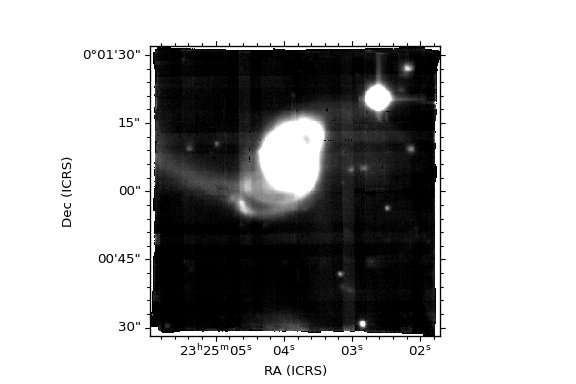

MuseCube: Ready!


<IPython.core.display.Javascript object>


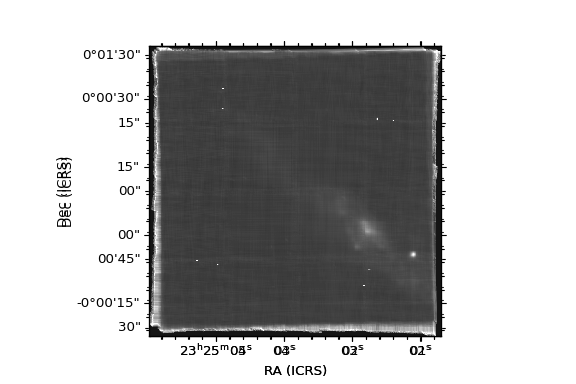

INFO: Auto-setting vmin to -7.870e+04 [aplpy.core]
INFO: Auto-setting vmax to  8.736e+05 [aplpy.core]


In [2]:
from PyMUSE.musecube import MuseCube
cube = MuseCube('/home/pc/Escritorio/SIT45/Cubos/SIT45C/ADP.2019-10-10T20_13_38.022-002.fits')
cube.create_white(new_white_fitsname='white_SIT45C.fits', stat=True, save=True)
coord_system = 'wcs'

### FILTERED IMAGES
Given the MUSE wavelength range PyMUSE can create r,i,R,V(Johnson) images:

In [10]:
cube.get_filtered_image('i', custom_filter=None, save=True)

INFO: Auto-setting vmin to -6.292e+04 [aplpy.core]
INFO: Auto-setting vmax to  6.442e+05 [aplpy.core]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
cube.get_filtered_image('r', custom_filter=None, save=True)

INFO: Auto-setting vmin to -6.499e+04 [aplpy.core]
INFO: Auto-setting vmax to  6.735e+05 [aplpy.core]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<IPython.core.display.Javascript object>


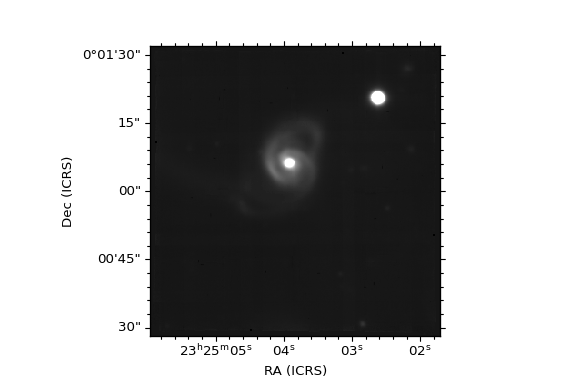

INFO: Auto-setting vmin to -6.765e+04 [aplpy.core]
INFO: Auto-setting vmax to  7.109e+05 [aplpy.core]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
cube.get_filtered_image('R', custom_filter=None, save=True)

<IPython.core.display.Javascript object>


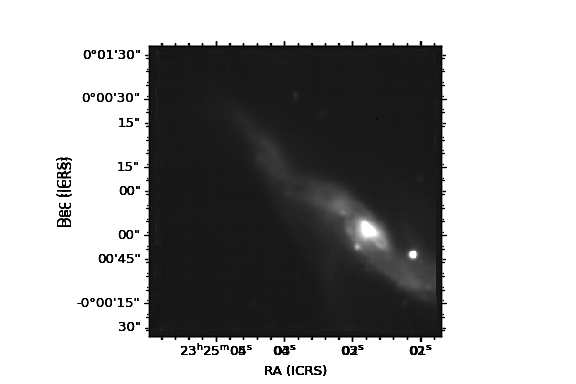

INFO: Auto-setting vmin to -5.128e+04 [aplpy.core]
INFO: Auto-setting vmax to  5.171e+05 [aplpy.core]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
cube.get_filtered_image('V', custom_filter=None, save=True)

#### Custom: Filtros adaptados a la eficiencia de VLT+MUSE.

<IPython.core.display.Javascript object>


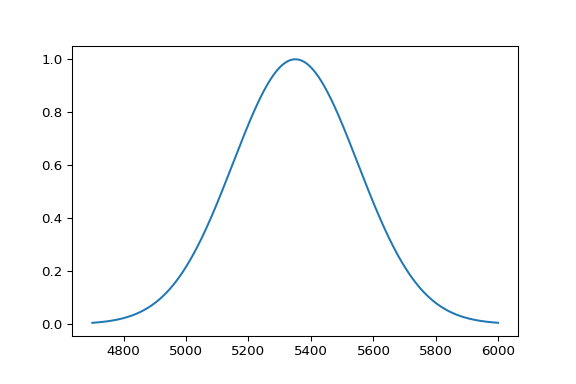

INFO: Auto-setting vmin to -5.280e+04 [aplpy.core]
INFO: Auto-setting vmax to  5.221e+05 [aplpy.core]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
Gauss=models.Gaussian1D(mean=5350,stddev=200,amplitude=1)
b=np.arange(4700,6000,1)
tc=Gauss(b)
plt.figure()
plt.plot(b,tc)
cube.get_filtered_image('b', custom_filter=[b,tc], save=True)

<IPython.core.display.Javascript object>


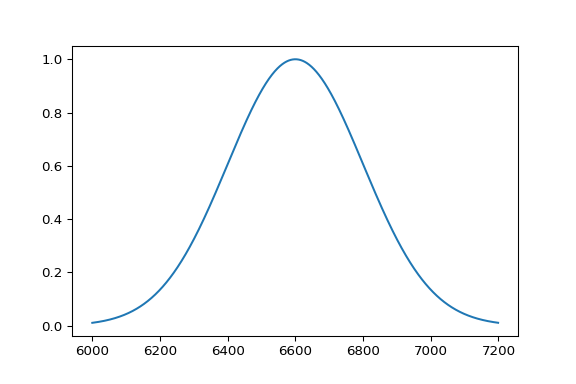

INFO: Auto-setting vmin to -4.724e+04 [aplpy.core]
INFO: Auto-setting vmax to  4.576e+05 [aplpy.core]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
Gauss=models.Gaussian1D(mean=6600,stddev=200,amplitude=1)
g=np.arange(6000,7200,1)
tc=Gauss(g)
plt.figure()
plt.plot(g,tc)
cube.get_filtered_image('g', custom_filter=[g,tc], save=True)


<IPython.core.display.Javascript object>


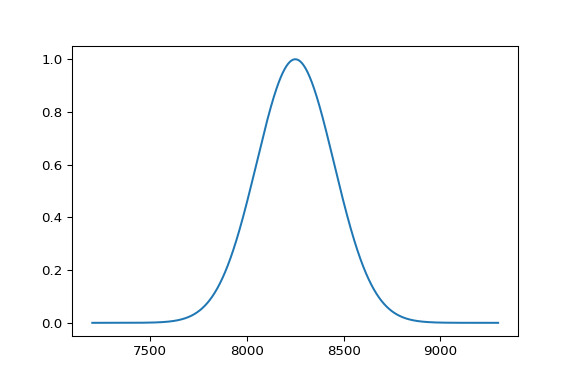

INFO: Auto-setting vmin to -6.506e+04 [aplpy.core]
INFO: Auto-setting vmax to  6.425e+05 [aplpy.core]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
Gauss=models.Gaussian1D(mean=8250,stddev=200,amplitude=1)
z=np.arange(7200,9300,1)
tc=Gauss(z)
plt.figure()
plt.plot(z,tc)
cube.get_filtered_image('z', custom_filter=[z,tc], save=True)

In [ ]:
#images = ['/home/francisco/Escritorio/AyInvest2021/MOSAIC/2/sit45_c_uncutted/sit45_c_mb.fits', '/home/francisco/Escritorio/AyInvest2021/MOSAIC/2/sit45_c_uncutted/sit45_c_mg.fits', '/home/francisco/Escritorio/AyInvest2021/MOSAIC/2/sit45_c_uncutted/sit45_c_mr.fits']
images = ['/home/francisco/Escritorio/AyInvest2021/MOSAIC/2/sit45_c_uncutted/']
kwargs = {
            'code': 'SWarp',
            'config': {
                'IMAGEOUT_NAME': '/home/francisco/Escritorio/AyInvest2021/MOSAIC/2/sit45_c_mosaic/sit45_c_mosaic.fits',
                'IMAGE_SIZE': '290,290',
                'CENTER': "351.2618,0.0026",
                'CENTER_TYPE': 'MANUAL',
                'INTERPOLATE': 'N'
            }
}            
       
swarp = aw.api.Astromatic(configuration_file = None, **kwargs)
swarp.run(images)

## Mosaic